In [178]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from datetime import date
from sklearn.preprocessing import MinMaxScaler
import math

**Importing Dataset and making required changes to it**

In [179]:
# Importing the Apple stock data
from google.colab import files
Upload=files.upload()

stocks = pd.read_csv('HistoricalData_APPLE.csv', index_col='Date', parse_dates=['Date'])
X = stocks.iloc[: ]
stocks.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,$127.13,56877940,$127.21,$127.75,$126.52
2021-06-08,$126.74,74403770,$126.6,$128.46,$126.2101
2021-06-07,$125.9,71057550,$126.17,$126.32,$124.8321
2021-06-04,$125.89,75169340,$124.07,$126.16,$123.85
2021-06-03,$123.54,76229170,$124.68,$124.85,$123.13


In [180]:
# Datatypes of all the columns of the stocks dataframe
stocks.dtypes

Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [181]:
# Removing $ symbol from Close, Open, High and Low columns to convert them to float values
stocks['Close/Last'] = list(map(lambda x: x[1:], stocks['Close/Last'].values))
stocks['Open'] = list(map(lambda x: x[1:], stocks['Open'].values))
stocks['High'] = list(map(lambda x: x[1:], stocks['High'].values))
stocks['Low'] = list(map(lambda x: x[1:], stocks['Low'].values))

# Converting the above columns to float dataype
stocks['Close/Last'] = stocks['Close/Last'].astype(float)
stocks['Open'] = stocks['Open'].astype(float)
stocks['High'] = stocks['High'].astype(float)
stocks['Low'] = stocks['Low'].astype(float)

In [182]:
stocks.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,127.13,56877940,127.21,127.75,126.5200
2021-06-08,126.74,74403770,126.60,128.46,126.2101
2021-06-07,125.90,71057550,126.17,126.32,124.8321
2021-06-04,125.89,75169340,124.07,126.16,123.8500
2021-06-03,123.54,76229170,124.68,124.85,123.1300


**Finding Missing/Null Values, if any**

In [183]:
# Checking the total number of null values columnwise
stocks.isnull().sum()

Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

**Visualizing Year-wise data**

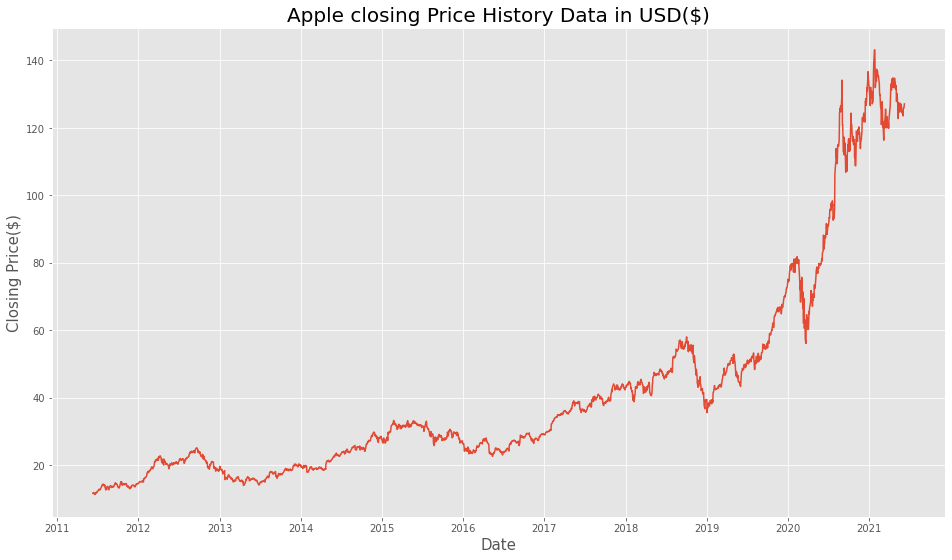

In [184]:
# visualizing the stock closing price (Year-wise)
plt.figure(figsize=(16,9))
style.use('ggplot')
plt.plot(stocks['Close/Last'])
plt.title("Apple closing Price History Data in USD($)", fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Closing Price($)", fontsize = 15)
plt.show()

**visualizing Month-wise data**

In [185]:
 stocks = pd.read_csv('HistoricalData_APPLE.csv', parse_dates=['Date'])
 stocks

,Date,Close/Last,Volume,Open,High,Low
0,2021-06-09,$127.13,56877940,$127.21,$127.75,$126.52
1,2021-06-08,$126.74,74403770,$126.6,$128.46,$126.2101
2,2021-06-07,$125.9,71057550,$126.17,$126.32,$124.8321
3,2021-06-04,$125.89,75169340,$124.07,$126.16,$123.85
4,2021-06-03,$123.54,76229170,$124.68,$124.85,$123.13
...,...,...,...,...,...,...
2511,2011-06-16,$11.6129,507299317,$11.675,$11.7386,$11.3689
2512,2011-06-15,$11.6696,395841722,$11.7768,$11.7964,$11.6029
2513,2011-06-14,$11.8729,333995906,$11.7857,$11.9018,$11.7611
2514,2011-06-13,$11.6643,329376468,$11.6857,$11.7254,$11.6096


In [186]:
 stocks['Date'] = list(map(lambda x: x.strftime('%B') + ' ' + str(x.year), stocks['Date']))
 stocks

,Date,Close/Last,Volume,Open,High,Low
0,June 2021,$127.13,56877940,$127.21,$127.75,$126.52
1,June 2021,$126.74,74403770,$126.6,$128.46,$126.2101
2,June 2021,$125.9,71057550,$126.17,$126.32,$124.8321
3,June 2021,$125.89,75169340,$124.07,$126.16,$123.85
4,June 2021,$123.54,76229170,$124.68,$124.85,$123.13
...,...,...,...,...,...,...
2511,June 2011,$11.6129,507299317,$11.675,$11.7386,$11.3689
2512,June 2011,$11.6696,395841722,$11.7768,$11.7964,$11.6029
2513,June 2011,$11.8729,333995906,$11.7857,$11.9018,$11.7611
2514,June 2011,$11.6643,329376468,$11.6857,$11.7254,$11.6096


**Removing $ symbol from Close, Open, High and Low columns to convert them to float values** **& Converting the columns to float dataype**

In [187]:

stocks['Close/Last'] = list(map(lambda x: x[1:], stocks['Close/Last'].values))
stocks['Open'] = list(map(lambda x: x[1:], stocks['Open'].values))
stocks['High'] = list(map(lambda x: x[1:], stocks['High'].values))
stocks['Low'] = list(map(lambda x: x[1:], stocks['Low'].values))


stocks['Close/Last'] = stocks['Close/Last'].astype(float)
stocks['Open'] = stocks['Open'].astype(float)
stocks['High'] = stocks['High'].astype(float)
stocks['Low'] = stocks['Low'].astype(float)

**Month-Wise Stock Closing Price**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


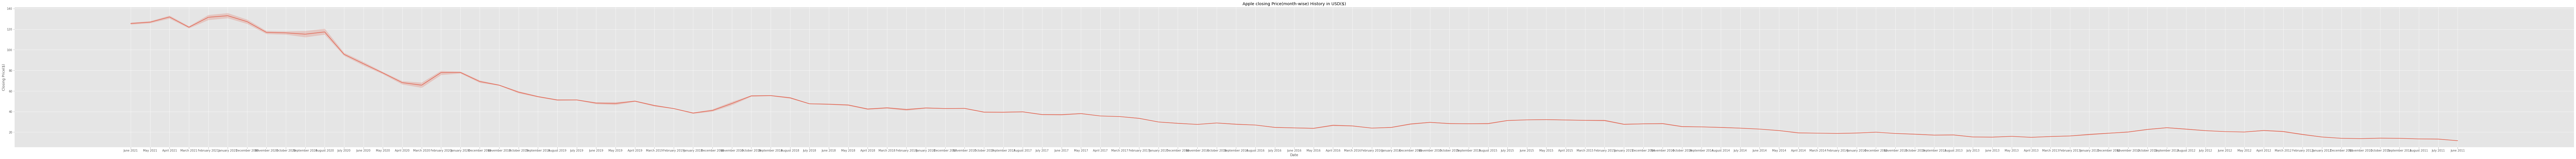

In [188]:

plt.figure(figsize=(160,9))
style.use('ggplot')
sns.lineplot(stocks['Date'], stocks['Close/Last'])
plt.title("Apple closing Price(month-wise) History in USD($)")
plt.xlabel("Date")
plt.ylabel("Closing Price($)")
plt.show()

**Deciding Training set & Applying Feature Scaling**

In [189]:
# Getting the training data
dataset = stocks.filter(['Close/Last']).values
trainset_len = math.ceil(len(dataset)*0.8)

In [190]:
# Feature Scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)

[[0.87846725]
 [0.87551043]
 [0.8691419 ]
 ...
 [0.00463614]
 [0.00305462]
 [0.00286508]]


In [191]:
# create training dataset
trainset_len = math.ceil(len(dataset) * 0.8)
train_data = scaled_data[0:trainset_len, :]

X_train = []
y_train = []
for i in range(60,len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i <= 61:
     print(X_train)
     print(y_train)

[array([0.87846725, 0.87551043, 0.8691419 , 0.86906609, 0.85124937,
       0.86277337, 0.85685974, 0.85936166, 0.86444132, 0.8763444 ,
       0.87672348, 0.8782398 , 0.86557856, 0.87983193, 0.85996819,
       0.86118124, 0.87194709, 0.88089335, 0.86209103, 0.84541155,
       0.86921772, 0.8763444 , 0.90181852, 0.89825517, 0.88582138,
       0.88392599, 0.9194836 , 0.9112955 , 0.92661029, 0.92736845,
       0.93350953, 0.93601145, 0.93297882, 0.91493465, 0.92676192,
       0.9238051 , 0.93692124, 0.93176577, 0.9343435 , 0.915617  ,
       0.93381279, 0.90962755, 0.92293322, 0.90295576, 0.88430506,
       0.87149219, 0.8691419 , 0.84715531, 0.84071097, 0.82365241,
       0.83494897, 0.83358428, 0.8288837 , 0.82509291, 0.84366779,
       0.85011213, 0.82433475, 0.82842881, 0.8604989 , 0.86663998])]
[0.8546610805573372]
[array([0.87846725, 0.87551043, 0.8691419 , 0.86906609, 0.85124937,
       0.86277337, 0.85685974, 0.85936166, 0.86444132, 0.8763444 ,
       0.87672348, 0.8782398 , 0.8655

In [192]:
from google.colab import files
Upload=files.upload()

news= pd.read_csv('gethistoricalmarketheadlines_20210610163519.csv')

X = news.iloc[: ]
news.head()

,Outcome,Message,Identity,Delay,Headlines Securities CIK,Headlines Securities CUSIP,Headlines Securities Symbol,Headlines Securities ISIN,Headlines Securities Valoren,Headlines Securities Name,Headlines Securities Market,Headlines Securities MarketIdentificationCode,Headlines Securities MostLiquidExchange,Headlines Securities CategoryOrIndustry,Headlines Title,Headlines Date,Headlines Time,Headlines UTCOffset,Headlines Source,Headlines Url,Headlines Images,Headlines Tags TagType,Headlines Tags TagValues,Headlines PaywallType,Headlines Summary
0,Success,NaN,Request,0.511007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ex-commodities chairman Timothy Massad calls f...,6/9/2021,11:56 PM,0,CNBC MAD Money Recap,https://www.cnbc.com/2021/06/09/ex-cftc-chairm...,NaN,Symbols,NaN,None,"""We need a better framework so that we can jus..."
1,Success,NaN,Request,0.511007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ex-commodities chairman Timothy Massad calls f...,6/9/2021,11:56 PM,0,CNBC MAD Money Recap,https://www.cnbc.com/2021/06/09/ex-cftc-chairm...,NaN,Companies,NaN,None,"""We need a better framework so that we can jus..."
2,Success,NaN,Request,0.511007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ex-commodities chairman Timothy Massad calls f...,6/9/2021,11:56 PM,0,CNBC MAD Money Recap,https://www.cnbc.com/2021/06/09/ex-cftc-chairm...,NaN,Sectors,NaN,None,"""We need a better framework so that we can jus..."
3,Success,NaN,Request,0.511007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ex-commodities chairman Timothy Massad calls f...,6/9/2021,11:56 PM,0,CNBC MAD Money Recap,https://www.cnbc.com/2021/06/09/ex-cftc-chairm...,NaN,Topics,NaN,None,"""We need a better framework so that we can jus..."
4,Success,NaN,Request,0.511007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GBP/USD sellers attack 1.4100 amid Brexit dold...,6/9/2021,11:56 PM,0,FXStreet News,https://www.fxstreet.com/news/gbp-usd-sellers-...,https://editorial.fxstreet.com/images/Markets/...,Topics,NaN,None,Read more on https://www.fxstreet.com...


In [193]:
news.shape


(6756, 25)

In [194]:
news.describe()

,Message,Delay,Headlines Securities CIK,Headlines Securities CUSIP,Headlines Securities ISIN,Headlines Securities Valoren,Headlines UTCOffset
count,0.0,6.756000e+03,6.516000e+03,0.0,0.0,6.670000e+03,6756.0
mean,NaN,5.110066e-01,1.082056e+06,NaN,NaN,2.204701e+07,0.0
std,NaN,6.795068e-14,5.065849e+05,NaN,NaN,2.314598e+07,0.0
min,NaN,5.110066e-01,3.453000e+03,NaN,NaN,4.229000e+04,0.0
25%,NaN,5.110066e-01,8.902152e+05,NaN,NaN,9.591840e+05,0.0
50%,NaN,5.110066e-01,1.075124e+06,NaN,NaN,2.015605e+07,0.0
75%,NaN,5.110066e-01,1.486298e+06,NaN,NaN,4.119388e+07,0.0
max,NaN,5.110066e-01,1.853084e+06,NaN,NaN,1.117085e+08,0.0


In [195]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6756 entries, 0 to 6755
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Outcome                                        6756 non-null   object 
 1   Message                                        0 non-null      float64
 2   Identity                                       6756 non-null   object 
 3   Delay                                          6756 non-null   float64
 4   Headlines Securities CIK                       6516 non-null   float64
 5   Headlines Securities CUSIP                     0 non-null      float64
 6   Headlines Securities Symbol                    6713 non-null   object 
 7   Headlines Securities ISIN                      0 non-null      float64
 8   Headlines Securities Valoren                   6670 non-null   float64
 9   Headlines Securities Name                      6713 

In [196]:
news.isna().sum()

Outcome                                             0
Message                                          6756
Identity                                            0
Delay                                               0
Headlines Securities CIK                          240
Headlines Securities CUSIP                       6756
Headlines Securities Symbol                        43
Headlines Securities ISIN                        6756
Headlines Securities Valoren                       86
Headlines Securities Name                          43
Headlines Securities Market                        43
Headlines Securities MarketIdentificationCode      43
Headlines Securities MostLiquidExchange             9
Headlines Securities CategoryOrIndustry            43
Headlines Title                                     0
Headlines Date                                      0
Headlines Time                                      0
Headlines UTCOffset                                 0
Headlines Source            

In [197]:
total_cells = np.product(news.shape)
total_missing = news.isna().sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

Outcome                                          0.000000
Message                                          4.000000
Identity                                         0.000000
Delay                                            0.000000
Headlines Securities CIK                         0.142096
Headlines Securities CUSIP                       4.000000
Headlines Securities Symbol                      0.025459
Headlines Securities ISIN                        4.000000
Headlines Securities Valoren                     0.050918
Headlines Securities Name                        0.025459
Headlines Securities Market                      0.025459
Headlines Securities MarketIdentificationCode    0.025459
Headlines Securities MostLiquidExchange          0.005329
Headlines Securities CategoryOrIndustry          0.025459
Headlines Title                                  0.000000
Headlines Date                                   0.000000
Headlines Time                                   0.000000
Headlines UTCO

In [198]:
news.dropna()

,Outcome,Message,Identity,Delay,Headlines Securities CIK,Headlines Securities CUSIP,Headlines Securities Symbol,Headlines Securities ISIN,Headlines Securities Valoren,Headlines Securities Name,Headlines Securities Market,Headlines Securities MarketIdentificationCode,Headlines Securities MostLiquidExchange,Headlines Securities CategoryOrIndustry,Headlines Title,Headlines Date,Headlines Time,Headlines UTCOffset,Headlines Source,Headlines Url,Headlines Images,Headlines Tags TagType,Headlines Tags TagValues,Headlines PaywallType,Headlines Summary


In [199]:
columns_with_na_dropped = news.dropna(axis=1)
columns_with_na_dropped.head()

,Outcome,Identity,Delay,Headlines Title,Headlines Date,Headlines Time,Headlines UTCOffset,Headlines Source,Headlines Url,Headlines Tags TagType,Headlines PaywallType
0,Success,Request,0.511007,Ex-commodities chairman Timothy Massad calls f...,6/9/2021,11:56 PM,0,CNBC MAD Money Recap,https://www.cnbc.com/2021/06/09/ex-cftc-chairm...,Symbols,None
1,Success,Request,0.511007,Ex-commodities chairman Timothy Massad calls f...,6/9/2021,11:56 PM,0,CNBC MAD Money Recap,https://www.cnbc.com/2021/06/09/ex-cftc-chairm...,Companies,None
2,Success,Request,0.511007,Ex-commodities chairman Timothy Massad calls f...,6/9/2021,11:56 PM,0,CNBC MAD Money Recap,https://www.cnbc.com/2021/06/09/ex-cftc-chairm...,Sectors,None
3,Success,Request,0.511007,Ex-commodities chairman Timothy Massad calls f...,6/9/2021,11:56 PM,0,CNBC MAD Money Recap,https://www.cnbc.com/2021/06/09/ex-cftc-chairm...,Topics,None
4,Success,Request,0.511007,GBP/USD sellers attack 1.4100 amid Brexit dold...,6/9/2021,11:56 PM,0,FXStreet News,https://www.fxstreet.com/news/gbp-usd-sellers-...,Topics,None


In [200]:
news_with_na_dropped = news.dropna(axis=1)
cols_in_original_dataset = news.shape[1]
cols_in_na_dropped= news_with_na_dropped.shape[1]
print("Columns in original dataset: %d \n" % news.shape[1])
print("Columns with na's dropped: %d" % news_with_na_dropped.shape[1])

dropped_columns = cols_in_original_dataset - cols_in_na_dropped
print(dropped_columns)


Columns in original dataset: 25 

Columns with na's dropped: 11
14


In [201]:
news_with_na_imputed = news.fillna(method='bfill', axis=0).head()


In [202]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [203]:
corpus = []
# Data = pd.read_csv('gethistoricalmarketheadlines_20210610163519.csv')
for i in range(0, 6756):
    review = re.sub('[^a-zA-Z]', ' ', columns_with_na_dropped['Headlines Title'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [204]:

len(corpus)

6756

In [205]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(corpus).toarray()
y = news.iloc[0:43942, 0].values

In [206]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)